# Data Wrangling

## PART I: Gather

In [1]:
import pandas as pd
import requests
import os
import numpy as np

In [2]:
# open the csv file
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# download the file from website
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# open the tsv file
df2 = pd.read_csv('image-predictions.tsv',sep="\t")
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [30]:
# Create new dataframe with id, retweet_count, and favorite_count.

tweet_json = open('tweet-json.txt', 'r')
df3 = pd.DataFrame(columns=['tweet_id', 'retweets', 'favorites'])

for line in tweet_json:
    tweet = json.loads(line)
    df3 = df3.append({'tweet_id': tweet['id'], 'retweets': tweet['retweet_count'], 'favorites': tweet['favorite_count']}, ignore_index=True)
tweet_json.close()

df3

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## PART II: Assess

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [32]:
df1['tweet_id'].duplicated().sum()

0

In [33]:
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [34]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [35]:
# The max unmber of the rating_numerator and rating_denomonator are odd, so check it up.
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [17]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [62]:
# Check up all of unnormal data in rating_denominator != 10.
pd.set_option('display.max_colwidth', -1)
df1[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [60]:
#Check up all of unormal data in rating_numerator > 15.
df1[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_numerator > 15')

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [63]:
#Check up all of unormal data in rating_numerator < 5.
df1[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_numerator < 5')


,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
883,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10
912,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1219,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4,10


In [23]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df2['tweet_id'].duplicated().sum()

0

In [39]:
df2.p1_dog.sample(5)

1192    True 
2041    True 
1448    False
1604    True 
1884    True 
Name: p1_dog, dtype: bool

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
retweets     2354 non-null object
favorites    2354 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


In [40]:
df3['tweet_id'].duplicated().sum()

0

#### Tidiness

1. Using one column for those columns: `Doggo`, `floofer`, `pupper`, `puppo`, because they are one varible.

2. Combine table `df3` into table `df1` by the common conlumn `tweet_id`. 

3. Combine table `df2` to clean out all of data that are not dogs from table`df1`. I will do this after clean both of them. 

#### Quality
##### `df1` table

1. Convert the `timestamp`'s data type from string to datetime form. 


2. Dorp the retweets and unnecessary uncloumns: `retweeted_status_id`,	`retweeted_status_user_id`,	`retweeted_status_timestamp`, and `expanded_urls`, `source`.

3. The following are incorrect data from extrcting, need to be correct:

>*`rating_denominator != 10`*:

> index = 313, tweet_id=835246439529840640, the number of the rating numerator and denominator should be 13/10 instead of 960/0.
> index = 784, tweet_id=775096608509886464,the number of the rating numerator and denominator should be 14/10 instead of 9/11.
> index = 1608, tweet_id=740373189193256964, the number of the rating numerator and denominator should be 14/10 instead of 9/11.
> index = 1662, tweet_id=682962037429899265,the number of the rating numerator and denominator should be 10/10 instead of 7/11.
> index = 2335, tweet_id=666287406224695296,the number of the rating numerator and denominator should be 9/10 instead of 1/2.

>* `rating_numerator > 15`*:

> index = 55, tweet_id=881633300179243008, the number of the rating numerator and denominator should be 13/10 instead of 17/10.
> index = 695, tweet_id=786709082849828864, the number of the rating numerator and denominator should be 9.75/10 instead of 75/10.
> index = 763, tweet_id=786709082849828864, the number of the rating numerator and denominator should be 13/10 instead of 17/10.
> index = 1202, tweet_id=716439118184652801,the number of the rating numerator and denominator should be 11/10 instead of 50/50.
> index = 1712, tweet_id=680494726643068929, the number of the rating numerator and denominator should be 11.26/10 instead of 26/10.

>* `rating_numerator < 5`*:

> index = 1165, tweet_id=722974582966214656, the number of the rating numerator and denominator should be 13/10 instead of 4/20.
> index = 1459, tweet_id=695064344191721472, the number of the rating numerator and denominator should be 13/10 instead of 4/10.
> index = 2335, tweet_id=666287406224695296, the number of the rating numerator and denominator should be 9/10 instead of 1/2.

4. In `name` column, missing dog names recorded as 'None' string instead of NaN

5. In `name` column, typing wrong in name being 'a', 'an', 'the'.

##### `df2` table

6. Remove `p1_dog`, `p2_dog`, and `p3_dog` are all "False".

7. Creat a ne conlumn for predicting god breed.

8. The datatype of `tweet_id` should be string instead of int.

##### `df3` table

9. Following cloumns should be int instead of string:`tweet_id`,`retweets`,`favorites`. 



## PART III: Clean

In [148]:
df1_clean =df1.copy()
df2_clean =df2.copy()
df3_clean =df3.copy()

### Tidiness

##### Define

> 1.`df1:` Using one column for those columns: `Doggo`, `floofer`, `pupper`, `puppo`.

##### Code

In [150]:
df1_clean['doggo'].replace('None','',inplace=True)
df1_clean['floofer'].replace('None','',inplace=True)
df1_clean['pupper'].replace('None','',inplace=True)
df1_clean['puppo'].replace('None','',inplace=True)

In [151]:
df1_clean['dog_stage'] = df1_clean['doggo']+df1_clean['floofer']+df1_clean['pupper']+df1_clean['puppo']

In [152]:
df1_clean.loc[df1_clean.dog_stage == 'doggopupper','dog_stage']='Doggo,Pupper'
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo','dog_stage']='Doggo,Puppo'
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer','dog_stage']='Doggo,Floofer'

In [153]:
df1_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1, inplace=True)

##### Test

In [154]:
df1_clean.dog_stage.value_counts()

                 1976
pupper           245 
doggo            83  
puppo            29  
Doggo,Pupper     12  
floofer          9   
Doggo,Puppo      1   
Doggo,Floofer    1   
Name: dog_stage, dtype: int64

In [102]:
df1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,


##### Define
> 2. Combine table `df3` into table `df1` by the common conlumn `tweet_id`.

*(For merging purposes, I moved quality 8 and 9 to here to clean.I will convert tweet_id to int and after merge I will convert it back to str.)*

 9. Following cloumns should be int instead of string:`retweets`,`favorites`. 
 8. The datatype of `tweet_id` should be string instead of int.

##### Code

In [155]:
df3_clean = df3_clean.astype({'tweet_id': int, 'retweets': int, 'favorites': int})

In [156]:
df1_clean = pd.merge(df1_clean, df3_clean, on=['tweet_id'],how='left')

##### Test

In [157]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
retweets                      2354 non-null float64
favorites                     2354 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


### Quality ( table `df1` )

##### Define
> 1. Convert the `timestamp`'s data type from string to datetime. 

##### Code

In [158]:
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

##### Test

In [159]:
df1_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

##### Define
> 2.Dorp the retweets and unnecessary uncloumns: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`,`expanded_urls`, and `source`.

##### Code

In [160]:
df1_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','source'], inplace=True)

##### Test

In [161]:
df1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,,8853.0,39467.0


##### Define
3. The following are incorrect data from extracting, need to be correct:

>* `rating_denominator != 10`*:

> index = 313, tweet_id=835246439529840640, the number of the rating numerator and denominator should be 13/10 instead of 960/0.
> index = 784, tweet_id=775096608509886464,the number of the rating numerator and denominator should be 14/10 instead of 9/11.
> index = 1608, tweet_id=740373189193256964, the number of the rating numerator and denominator should be 14/10 instead of 9/11.
> index = 1662, tweet_id=682962037429899265,the number of the rating numerator and denominator should be 10/10 instead of 7/11.
> index = 2335, tweet_id=666287406224695296,the number of the rating numerator and denominator should be 9/10 instead of 1/2.

>*`rating_numerator > 15`*:

> index = 55, tweet_id=881633300179243008, the number of the rating numerator and denominator should be 13/10 instead of 17/10.
> index = 695, tweet_id=786709082849828864, the number of the rating numerator and denominator should be 9.75/10 instead of 75/10.
> index = 763, tweet_id=786709082849828864, the number of the rating numerator and denominator should be 13/10 instead of 17/10.
> index = 1202, tweet_id=716439118184652801,the number of the rating numerator and denominator should be 11/10 instead of 50/50.
> index = 1712, tweet_id=680494726643068929, the number of the rating numerator and denominator should be 11.26/10 instead of 26/10.

>*`rating_numerator < 5`*:

> index = 1165, tweet_id=722974582966214656, the number of the rating numerator and denominator should be 13/10 instead of 4/20.
> index = 1459, tweet_id=695064344191721472, the number of the rating numerator and denominator should be 13/10 instead of 4/10.
> index = 2335, tweet_id=666287406224695296, the number of the rating numerator and denominator should be 9/10 instead of 1/2.


##### Code

In [162]:
# Correct the wrong data in rating_denominator != 10
df1_clean.at[313,'rating_numerator']= 13
df1_clean.at[313,'rating_denominator']=10

df1_clean.at[784,'rating_numerator']= 14
df1_clean.at[784,'rating_denominator']=10

df1_clean.at[1608,'rating_numerator']= 14
df1_clean.at[1608,'rating_denominator']=10

df1_clean.at[1662,'rating_numerator']=10
df1_clean.at[1662,'rating_denominator']=10

df1_clean.at[2335,'rating_numerator']=9
df1_clean.at[2335,'rating_denominator']=10

In [163]:
# Correct the wrong data in rating_numerator > 15
df1_clean.at[55,'rating_numerator']=13
df1_clean.at[55,'rating_denominator']=10

df1_clean.at[695,'rating_numerator']=9.75
df1_clean.at[695,'rating_denominator']=10

df1_clean.at[763,'rating_numerator']=13
df1_clean.at[763,'rating_denominator']=10

df1_clean.at[1202,'rating_numerator']=11
df1_clean.at[1202,'rating_denominator']=10

df1_clean.at[1712,'rating_numerator']=11.26
df1_clean.at[1712,'rating_denominator']=10


In [164]:
# Correct the wrong data in rating_numerator < 5
df1_clean.at[1165,'rating_numerator']=13
df1_clean.at[1165,'rating_denominator']=10

df1_clean.at[1459,'rating_numerator']=13
df1_clean.at[1459,'rating_denominator']=10

df1_clean.at[2335,'rating_numerator']=9
df1_clean.at[2335,'rating_denominator']=10

##### Test

In [165]:
df1_clean[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [166]:
df1_clean[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_numerator > 15')

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [167]:
df1_clean[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_numerator < 5')

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
883,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10
912,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1219,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10


##### Define
> 4. In `name` column, missing dog names recorded as 'None' string instead of NaN

##### Code

In [168]:
df1_clean['name'] = df1_clean['name'].replace('None', np.nan)

##### Test

In [169]:
sum(df1_clean['name'] == 'None')

0

##### Define:
> 5.  In `name` column, typing wrong in name being 'a', 'an', 'the'.

##### Code

In [170]:
df1_clean['name'] = df1_clean['name'].replace(['a', 'an', 'the'], np.nan)

##### Test

In [171]:
sum(df1_clean['name'] == 'a') + sum(df1_clean['name'] == 'an') + sum(df1_clean['name'] == 'a')

0

##### Define: `df2` table
> 6. Remove `p1_dog`, `p2_dog`, and `p3_dog` are all "False".

##### Code

In [172]:
df2_clean1 = df2_clean.query('((p1_dog == True) or (p2_dog == True) or (p3_dog == True))')


##### Test

In [173]:
df2_clean1.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### Define: table`df2`
> 9.Creat a new conlumn for predicting god breed.

##### Code

In [174]:
# Create a new conlumn for predicting god breed based on the confidence over 20%. 
df2_clean1['breeds'] = [i['p1'] if i['p1_conf'] > 0.2 
                     else i['p2'] if i['p2_conf'] > 0.2
                     else i['p3'] if i['p3_conf'] > 0.2
                     else np.nan for index, i in df2_clean1.iterrows()]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


##### Test

In [175]:
df2_clean1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breeds
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


##### define: Tidiness 3
> 3.Combine table df2 to clean out all of data that are not dogs from tabledf1. I will do this after clean both of them.

##### Code

In [176]:
df_master = pd.merge(df1_clean, df2_clean1, on = ['tweet_id'], how = 'right')

In [177]:
df1_clean = df1_clean.astype({'tweet_id': str})

##### Test

In [178]:
df_master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breeds
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,,6514.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua


### Iterate: Assess for table `df_master`:

1. I found out the image of `in_reply_to_status_id` and `in_reply_to_user_id` is not WeRateDog orignal tweet, so I decided to clean out.

2. Base on my analysis direction, so I decided to drop off all of unnecessary conlumns: `img_num`,`p1`,`p1_conf`,`p1_dog`,`p2`,`p2_conf`,`p2_dog`,`p3`,`p3_conf`,`p3_dog`.

3. My analysis result with strongly related to the data of `retweets` and `favorites`, so I decided to clean out all missing value on those two conlumns.

In [179]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 23 columns):
tweet_id                 1751 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1751 non-null datetime64[ns, UTC]
text                     1751 non-null object
rating_numerator         1751 non-null int64
rating_denominator       1751 non-null int64
name                     1255 non-null object
dog_stage                1751 non-null object
retweets                 1750 non-null float64
favorites                1750 non-null float64
jpg_url                  1751 non-null object
img_num                  1751 non-null int64
p1                       1751 non-null object
p1_conf                  1751 non-null float64
p1_dog                   1751 non-null bool
p2                       1751 non-null object
p2_conf                  1751 non-null float64
p2_dog                   1751 non-null bool
p3          

In [180]:
df_master.query('in_reply_to_status_id != "NaN"').sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breeds
1080,695767669421768709,6.753494e+17,4.196984e+09,2016-02-06 00:35:13+00:00,If you are aware of who is making these please let me know. 13/10 vroom vroom https://t.co/U0D1sbIDrG,13,10,NaN,,854.0,...,soft-coated_wheaten_terrier,0.805139,True,Lakeland_terrier,0.121662,True,Afghan_hound,0.023303,True,soft-coated_wheaten_terrier
114,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53+00:00,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",14,10,NaN,,1195.0,...,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False,Lakeland_terrier
1115,692142790915014657,6.920419e+17,4.196984e+09,2016-01-27 00:31:15+00:00,These are some pictures of Teddy that further justify his 13/10 rating. Please enjoy https://t.co/tDkJAnQsbQ,13,10,NaN,,438.0,...,toy_poodle,0.670068,True,teddy,0.190898,False,miniature_poodle,0.032178,True,toy_poodle
178,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57+00:00,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",13,10,NaN,,2909.0,...,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True,tennis_ball
1404,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58+00:00,I have found another. 13/10 https://t.co/HwroPYv8pY,13,10,NaN,,1225.0,...,giant_schnauzer,0.119693,True,Afghan_hound,0.072763,True,miniature_schnauzer,0.063786,True,NaN


In [181]:
# when click the link, I found out it's a srceen shot and it's not orignal post.
df_master.query('tweet_id == 863079547188785154')['jpg_url']

114    https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg
Name: jpg_url, dtype: object

### Iterate: clean for table `df_master`

##### Define
> 1. I found out the image of `in_reply_to_status_id` and `in_reply_to_user_id` is not WeRateDog orignal tweet, so I decided to clean out.
>2. Base on my analysis direction, so I decided to drop off all of unnecessary conlumns: `img_num`,`p1`,`p1_conf`,`p1_dog`,`p2`,`p2_conf`,`p2_dog`,`p3`,`p3_conf`,`p3_dog`.

##### Code

In [182]:
df_master1 = df_master.query('in_reply_to_status_id == "NaN"')
df_master1 = df_master1.drop(['in_reply_to_status_id', 'in_reply_to_user_id','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

##### Test

In [183]:
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 1750
Data columns (total 11 columns):
tweet_id              1731 non-null int64
timestamp             1731 non-null datetime64[ns, UTC]
text                  1731 non-null object
rating_numerator      1731 non-null int64
rating_denominator    1731 non-null int64
name                  1254 non-null object
dog_stage             1731 non-null object
retweets              1730 non-null float64
favorites             1730 non-null float64
jpg_url               1731 non-null object
breeds                1614 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 162.3+ KB


##### Define
> 3. My analysis result with strongly related to the data of `retweets` and `favorites`, so I decided to clean out all missing value on those two conlumns.

##### Code

In [209]:
df_master2 = df_master1.query('retweets != "NaN"')

In [210]:
df_master3 = df_master2.query('favorites != "NaN"')

##### Test

In [211]:
df_master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1750
Data columns (total 11 columns):
tweet_id              1730 non-null int64
timestamp             1730 non-null datetime64[ns, UTC]
text                  1730 non-null object
rating_numerator      1730 non-null int64
rating_denominator    1730 non-null int64
name                  1253 non-null object
dog_stage             1730 non-null object
retweets              1730 non-null float64
favorites             1730 non-null float64
jpg_url               1730 non-null object
breeds                1613 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 162.2+ KB


### Storing

In [212]:
df_master2.to_csv('twitter_archive_master.csv', index=False)

## PART IV: Analyzing and Visualizing

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.25)
%matplotlib inline

df = pd.read_csv('twitter_archive_master.csv')

In [213]:
df.shape

(1730, 11)

In [214]:
df['rating_numerator'].describe()

count    1730.000000
mean     11.346821  
std      7.105823   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      165.000000 
Name: rating_numerator, dtype: float64

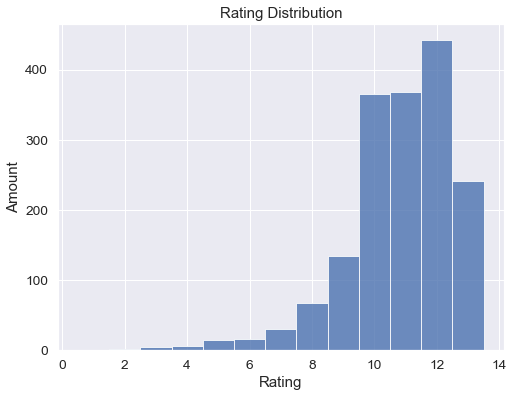

In [215]:
# The distribution of ratings 
plt.figure(figsize=[8,6])
plt.hist(df['rating_numerator'], bins=np.arange(0.5, 14.5, 1), alpha=0.8)
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.title('Rating Distribution');

In [217]:
df['favorites'].describe()

count    1730.000000  
mean     8944.575145  
std      12528.699474 
min      0.000000     
25%      1860.250000  
50%      4148.000000  
75%      11326.500000 
max      132810.000000
Name: favorites, dtype: float64

In [218]:
df['retweets'].describe()

count    1730.000000 
mean     3062.583815 
std      5231.212269 
min      16.000000   
25%      665.250000  
50%      1510.500000 
75%      3517.500000 
max      79515.000000
Name: retweets, dtype: float64

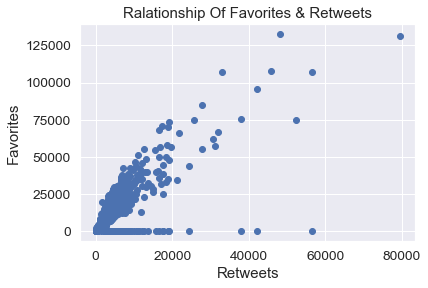

In [219]:
# Look at the ralationship between favorites and retweets
plt.scatter(np.array(df['retweets']),np.array(df['favorites']));
plt.xlabel("Retweets");
plt.ylabel("Favorites");
plt.title("Ralationship Of Favorites & Retweets");

## Insight 1:
> **The relationship of favorites and retweets is positive, which means the more people like the tweet, they more likely would retweet it.**

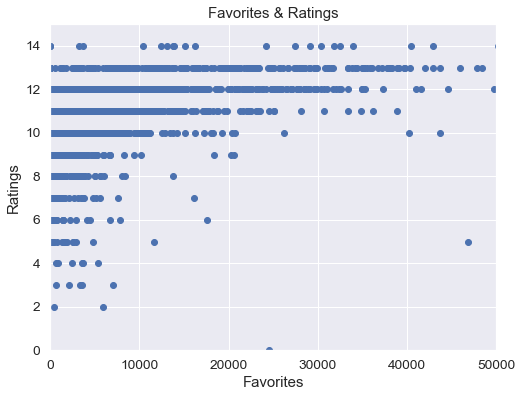

In [229]:
# Look at the ralationship between favorites and ratings
plt.figure(figsize=[8,6])
plt.scatter(x=df['favorites'], y=df['rating_numerator'])
plt.xlim(0, 50000)
plt.ylim(0, 15)
plt.xlabel('Favorites')
plt.ylabel('Ratings')
plt.title('Favorites & Ratings');

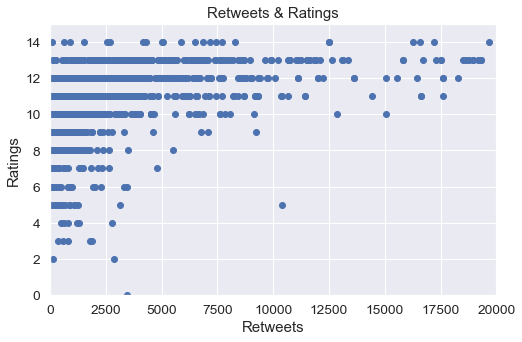

In [231]:
# Look at the ralationship between retweets and ratings
plt.figure(figsize=[8,5])
plt.scatter(x=df['retweets'], y=df['rating_numerator'])
plt.xlim(0, 20000)
plt.ylim(0, 15)
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweets & Ratings');

## Insight2:
> **The higher rating, the more fovorites. The higher rating, the more retweets. In other words, if WeRateDog could post more high rating (between 12-13) post, there are more people would like it and retweet it.**

In [248]:
# Group the number of favorites for each dog stage.
fav_stage = df.groupby('dog_stage')['favorites'].mean()
fav_stage = fav_stage.sort_values(ascending=False)
fav_stage

dog_stage
Doggo,Puppo      47844.000000
puppo            20482.454545
doggo            18382.964912
Doggo,Floofer    17169.000000
floofer          13206.000000
Doggo,Pupper     10780.444444
pupper           7406.123529 
Name: favorites, dtype: float64

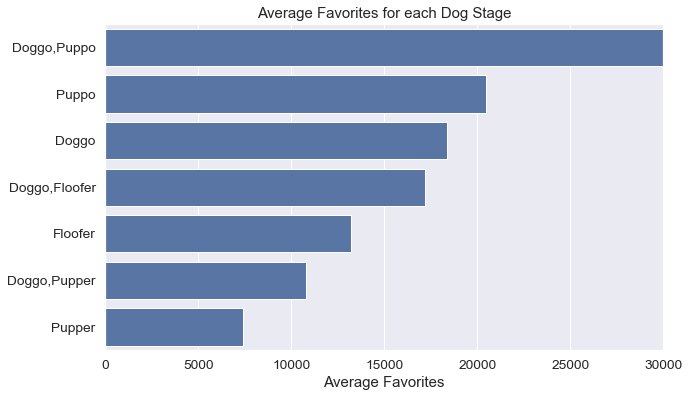

In [257]:
# Define axis values
x_axis = list(fav_stage)
y_axis = [i.title() for i in fav_stage.index]

# Plot the bar chart
plt.figure(figsize=[10,6])
plt.xlim(0,30000)
plt.xlabel('Average Favorites')
plt.title('Average Favorites for each Dog Stage')
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b")
plt.show()

## Insight 3:
>**The most popular dog stage is between Doggo and Puppo.People like the different stages of dogs, but the most popular dog stage is between Doggo and Puppo.**


In [196]:
df_2016 = df[(df['timestamp'] > '2015-12-31 00:00:00') & (df['timestamp'] < '2016-12-31 00:00:00')]
df_2016.shape

(887, 11)

In [258]:
df.breeds.describe()

count     1613            
unique    201             
top       golden_retriever
freq      145             
Name: breeds, dtype: object

In [245]:
# Group the breeds and favorites for each group
fav_breed = df_2016.groupby('breeds').mean().favorites
# Show the dog breeds that appear less than 15 times
fav_breeds = fav_breed[df_2016['breeds'].value_counts() > 3].sort_values(ascending=False)
fav_breeds_top20 = fav_breeds.head(20)
fav_breeds_top20

breeds
Eskimo_dog              19501.500000
Norwegian_elkhound      14334.600000
dingo                   10967.000000
Labrador_retriever      10839.392157
seat_belt               10065.545455
miniature_pinscher      9464.090909 
French_bulldog          9418.125000 
tennis_ball             9308.750000 
vizsla                  9198.833333 
golden_retriever        8943.045977 
Chihuahua               8908.033333 
malamute                8884.888889 
cocker_spaniel          8844.842105 
Great_Pyrenees          8388.777778 
Old_English_sheepdog    8218.000000 
Cardigan                8123.875000 
kelpie                  7887.200000 
Pembroke                7626.625000 
Samoyed                 7614.363636 
teddy                   7601.714286 
Name: favorites, dtype: float64

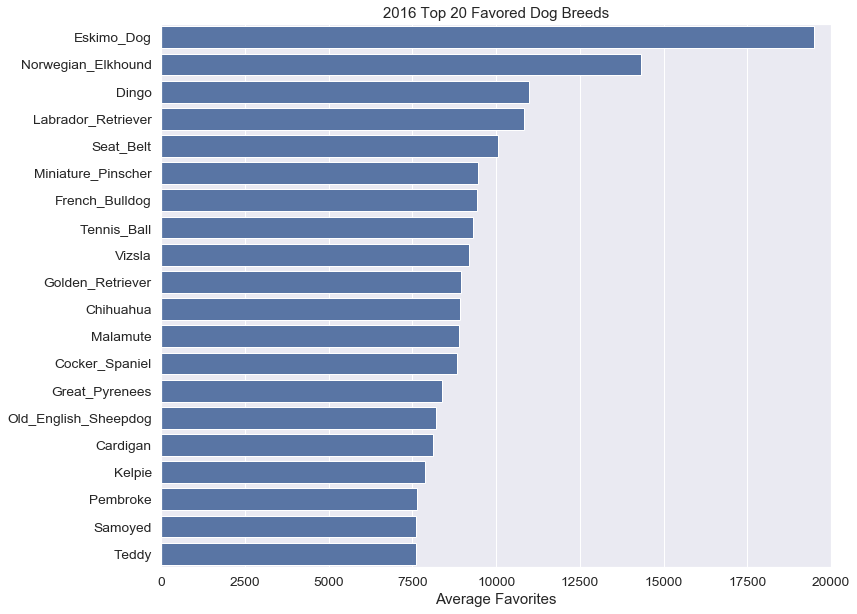

In [246]:
# Define axis values
x_axis = list(fav_breeds_top20)
y_axis = [i.title() for i in fav_breeds_top20.index]

# Plot the bar chart
plt.figure(figsize=[12,10])
plt.xlim(0, 20000)
plt.xlabel('Average Favorites')
plt.title('2016 Top 20 Favored Dog Breeds')
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b")
plt.show()

## Insight4:
> **There are top 20 favored dog breeds in 2016. The No.1 is Eskimo_Dog. Thus, WeRateDog should post more those favored dog breeds inorder to get more favorites and retweets.**